<img src="logo-utn-frba.png" style="float: right;" width="200" height="40" alt="InternetCtrl">
<p style=" font-family: Courier New,Courier,Lucida Sans Typewriter,Lucida Typewriter,monospace; text-align: left;"><font color='black'>TEORÍA DE LOS CIRCUITOS II<br>Curso R4052</font></p>

<p style="border: ridge black 2px;  padding: 25px; text-align: center;font-weight: italic; font-size:50px; background-size: 80% 80%; background-color:#FF4040">
  Laboratorio de filtros digitales
</p>

<p style="border: ridge #87CEFA 2px; text-align: left;font-weight: italic; font-size:15px;"><font color='87CEFA'>Laboratorio de filtros digitales: Mitigación de Interferencias en el Electrocardiograma durante la Prueba de Esfuerzo:</p>

<h2> Introducción  </h2>

<img src="./Recording-ECG.jpg" align="right" width="150"
style="border:10px solid white" /> 


<p style="text-align: justify; font-weight: italic; font-size:15px;">
El electrocardiograma de superficie (ECG) es una medición no nvasiva del potencial eléctrico producido por el dipolo 
eléctrico resultante en cada célula cardíaca. Por lo genral, para la medición del ECG se colocan electrodos en
las extremidades del cuerpo y sobre la superficie del torso, como se aprecia en la figura. Debido a que es una técnica no invasiva y su costo no es elevado, es ampliamente utilizada en la clínica médica para conocer la funcionalidad del corazón. Habitualmente se miden entre una y doce señales de ECG dependiendo de la patología bajo análisis.</p>


<img src="./ergo_iss.jpg" align="left" width="350"
style="border:10px solid white" /> 


<p style="text-align: justify; font-weight: italic; font-size:15px;">
La señal de ECG también es afectada por los campos eléctricos generados por todas las otras fuentes biológicas del organismo bajo estudio (ruido muscular), como también por otros factores como el movimiento de los electrodos sobre la piel y el acople de la línea eléctrica (50/60 Hz) entre otros. Una de las primeras tareas previas al análisis del ECG es el filtrado de interferencias. En el siguiente ejemplo, procederemos al filtrado de un ECG registrado durante una prueba de esfuerzo o ergometría. En dichos registros, las interferencias musculares son muy exageradas dado al esfuerzo físico al que es sometido el paciente.</p>

<p style="text-align: justify; font-weight: italic; font-size:15px;">
Para tal fin, se procede a procesar la señal de ECG con diferentes filtros recursivos, o de respuesta infinita al impulso (IIR), como también filtros no recursivos, o de respuesta finita al impulso (FIR). Dichos filtros han sido presentados en clase, por lo que en el siguiente documento evaluaremos su desempeño de forma cualitativa en señales reales.</p>


<p style="border: ridge #87CEFA 2px; text-align: left;font-weight: italic; font-size:15px;"><font color='87CEFA'>Experimentación</p>

<p style="text-align: justify; font-weight: italic; font-size:15px;">
Utilizaremos un registro de ECG proveniente de una prueba ergonométrica o de esfuerzo. El mismo ha sido digitalizado a una frecuencia de muestreo de 1000 Hz, y se encuentra guardado en el archivo <em>ecg.mat</em>.</p>

<p style="text-align: justify; font-weight: italic; font-size:15px;">Los filtros digitales pueden ser clasificados como recursivos o no recursivos, aunque en la asignatura lo hacemos dependiendo del soporte temporal de la respuesta al impulso. Es decir de respuesta finita (FIR) o infinita al impulso (IIR). Durante la primera parte de la asignatura, estudiamos diferentes aproximaciones a la respuesta ideal de un filtro, como la de Butterworth, Chebyshev y Bessel. En cada caso, logramos obtener una función matemática, es decir una función transferencia en el dominio de la frecuencia compleja $T(s)$, que luego se implementa mediante un circuito electrónico analógico. Luego hemos visto que $T(s)$ puede discretizarse, y en consecuencia modelar el comportamiento de un sistema digital, o muestreado a $T_S=1/f_S$ mediante la <a href="http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/filter_design/bilinear_transform.ipynb" target="_blank">(transformada bilineal)</a>, es decir $s = 2 \, f_S \cdot \frac{z - 1}{z + 1}$
\begin{equation}
T(z) = T(s) \Big\vert_{s = 2 \,f_S \cdot \frac{z - 1}{z + 1}}
\end{equation}</p>
<p style="text-align: justify; font-weight: italic; font-size:15px;">
Es decir, dada una sección de segundo orden (SOS) analógica

\begin{equation}
T(s) = \frac{\beta_0 + \beta_1 s + \beta_2 s^2}{\alpha_0 + \alpha_1 s + \alpha_2 s^2}
\end{equation}

su equivalente digital $T(z)$ también podrá expresarse como un cociente de polinomios en $z$, aunque como hemos visto, por razones de implementación lo haremos respecto a $z^{-1}$

\begin{equation}
T(z) = \frac{(\beta_2 K^2 - \beta_1 K + \beta_0) \, z^{-2} + (2 \beta_0 - 2 \beta_2 K^2) \,  z^{-1} + (\beta_2 K^2 + \beta_1 K + \beta_0)}
{(\alpha_2 K^2 - \alpha_1 K + \alpha_0) \, z^{-2} + (2 \alpha_0 - 2 \alpha_2 K^2) \,  z^{-1} + (\alpha_2 K^2 + \alpha_1 K + \alpha_0)}
\end{equation}
donde $K = 2f_S$.

Para luego reescribir $T(z)$ en función de los coeficientes del sistema muestreado $b_m$ y $a_n$

\begin{equation}
T(z) = \frac{Y(z)}{X(z)} = \frac{ b_2 \, z^{-2} + b_1 \,  z^{-1} + b_0 }
{a_2 \, z^{-2} + a_1 \,  z^{-1} + a_0}
\end{equation}
<p style="text-align: justify; font-weight: italic; font-size:15px;">
obteniendo también una SOS como era de esperar, dado que la transformada bilineal es una transformación conforme. Una vez obtenida nuestra $T(z)$ de orden arbitrario, solo resta partir la transferencia en subsecciones de segundo orden (SOS). Para ello, es necesario conocer tanto la <a ref="http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/recursive_filters/direct_forms.ipynb" target="_blank">estructura</a>como la forma en que nuestro paquete de software implementa las <a ref="http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/recursive_filters/cascaded_structures.ipynb" target="_blank">SOS's</a>
    e. En el caso de <em>SciPy</em>, cuenta con una familia de funciones donde es muy sencillo diseñar y utilizar filtros digitales implementados como SOS's, como se verá en la implementación.</p>
<p style="text-align: justify; font-weight: italic; font-size:15px;">
Para llegar a la implementación de nuestro filtro digital $T(z)$, se despeja $Y(z)$

\begin{equation}
Y(z) =  \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \, X(z) \, z^{-m} - \sum_{n=1}^{N} a_n \, Y(z) \, z^{-n} \right)
\end{equation}

finalmente se obtiene $y[k]$ por simple inspección sabiendo que $y[k-m] = Y(z) \, z^{-m}$

\begin{equation}
y[k] = \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \; x[k-m] - \sum_{n=1}^{N} a_n \; y[k-n] \right) \label{eq:ec_dif}
\end{equation}

Esta ecuación nos permite conocer el valor de la salida actual, y se la conoce como <em>ecuación de diferencias</em>. Esta misma ecuación es lo suficientemente general para la implementación de filtros IIR, como también de los FIR. Basta con hacer $a_n = 0$ para que la ec. \eqref{eq:ec_dif} se convierta en la convolución discreta entre $x[k]$ y la respuesta al impulso finita, dada por $b[m]=(b_0, b_1, \cdots, b_M)$. Los coeficientes $b_m$ del filtro FIR, pueden calcularse por ejemplo, mediante el <a href="http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/filter_design/window_method.ipynb" target="_blank">método de ventanas</a>, entre <a href="http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/filter_design/frequency_sampling_method.ipynb" target="_blank">otros</a>.</p>

<p style="text-align: justify; font-weight: italic; font-size:15px;">
Como se trata de un análisis *offline* utilizando una arquitectura computacional sin limitaciones numéricas, como las provistas por las librerías SciPy y NumPy, algunos problemas relacionados a la implementación con aritmética y palabras de cuantización finitas no son tenidos en cuenta. Se refiere a los estudiantes interesados a los siguientes documentos acerca de <a href="http://nbviewer.jupyter.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/recursive_filters/quantization_of_coefficients.ipynb" target="_blank">errores por la cuantización de coeficientes</a> y por una unidades aritméticas limitadas (<a href="https://nbviewer.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/recursive_filters/quantization_of_variables.ipynb" target="_blank">1</a>,<a href="https://nbviewer.org/github/spatialaudio/digital-signal-processing-lecture/blob/master/nonrecursive_filters/quantization_effects.ipynb" target="_blank">2</a>). También se le recomienda a los estudiantes interesados revisar las asignaturas optativas relacionadas al <a href="https://www.campusvirtual.frba.utn.edu.ar/especialidad/course/view.php?id=1070" target="_blank">Procesamiento Digital de Señales (DSP)</a>, como también al <a href="https://www.campusvirtual.frba.utn.edu.ar/especialidad/course/view.php?id=300" target="_blank">DSP en tiempo real</a></p>

<p style="border: ridge #87CEFA 2px; text-align: left;font-weight: italic; font-size:15px;"><font color='87CEFA'>Parte 1 - Diseño de filtros</p>

<p style="text-align: left;font-weight: italic; font-size:15px;"><font color='87CEFA'>Filtro IIR</p>

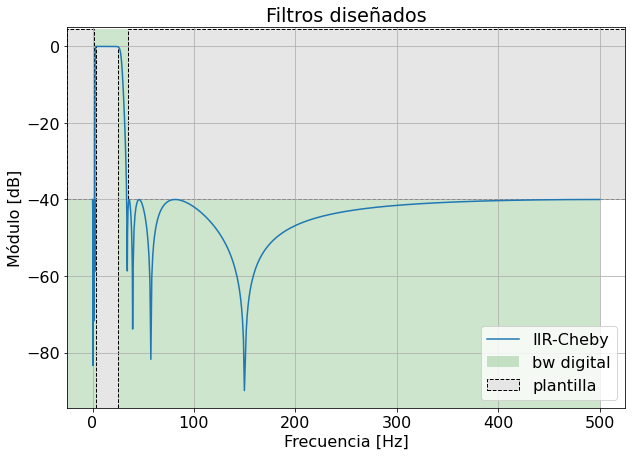

In [6]:
# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from splane import plot_plantilla

fig_sz_x = 10
fig_sz_y = 7
fig_dpi = 100 # dpi

fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
plt.rcParams.update({'font.size':fig_font_size})

###
## Señal de ECG registrada a 1 kHz, con contaminación de diversos orígenes.
###

# para listar las variables que hay en el archivo
#io.whosmat('ecg.mat')
mat_struct = sio.loadmat('ecg.mat')

ecg_one_lead = mat_struct['ecg_lead']
ecg_one_lead = ecg_one_lead.flatten()
cant_muestras = len(ecg_one_lead)

fs = 1000 # Hz
nyq_frec = fs / 2


# Plantilla

# filter design
ripple = 0 # dB
atenuacion = 40 # dB

ws1 = 1.0 #Hz
wp1 = 3.0 #Hz
wp2 = 25.0 #Hz
ws2 = 35.0 #Hz

frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec
gains = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains/20)

bp_sos_cheby = sig.iirdesign([wp1, wp2], [ws1, ws2], 0.1, 40, False, 'cheby2', 'sos', fs)

w_rad  = np.append(np.logspace(-2, 0.8, 250), np.logspace(0.9, 1.6, 250) )
w_rad  = np.append(w_rad, np.linspace(40, nyq_frec, 500, endpoint=True) ) / nyq_frec * np.pi
_, h_cheby = sig.sosfreqz(bp_sos_cheby, w_rad)


plt.plot((w_rad/np.pi)*500, 20*np.log10(np.abs(h_cheby)+1e-12), label='IIR-Cheby'.format(bp_sos_cheby.shape[0]*2) )
plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

<p style="text-align: left;font-weight: italic; font-size:15px;"><font color='87CEFA'>Filtro FIR</p>

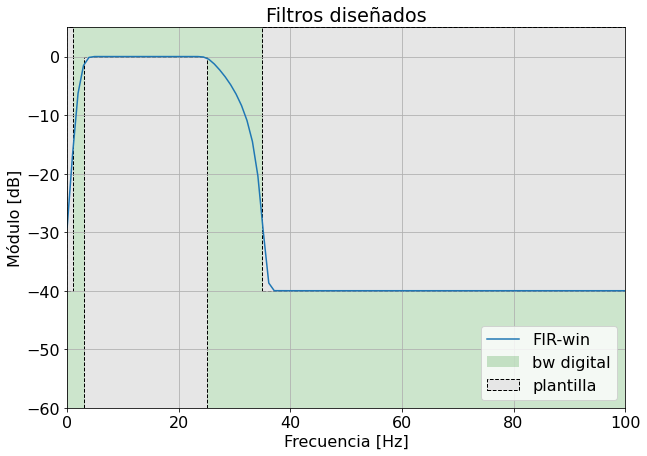

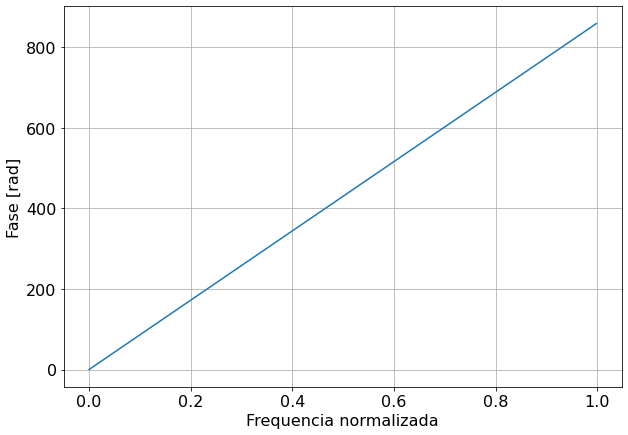

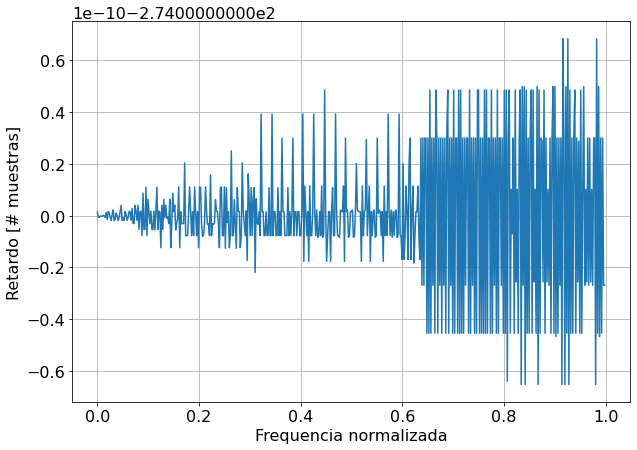

In [7]:
# Inicialización e importación de módulos

# Módulos para Jupyter
import warnings
warnings.filterwarnings('ignore')

# Módulos importantantes
import scipy.signal as sig
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.io as sio
from splane import plot_plantilla

def group_delay(ww, phase): 
    
    groupDelay = -np.diff(phase)/np.diff(ww)
    
    return(np.append(groupDelay, groupDelay[-1]))

# fig_sz_x = 10
# fig_sz_y = 7
# fig_dpi = 100 # dpi

# fig_font_size = 16

# mpl.rcParams['figure.figsize'] = (fig_sz_x,fig_sz_y)
# plt.rcParams.update({'font.size':fig_font_size})

# ###
# ## Señal de ECG registrada a 1 kHz, con contaminación de diversos orígenes.
# ###

# # para listar las variables que hay en el archivo
# #io.whosmat('ecg.mat')
# mat_struct = sio.loadmat('ecg.mat')

# ecg_one_lead = mat_struct['ecg_lead']
# ecg_one_lead = ecg_one_lead.flatten()
# cant_muestras = len(ecg_one_lead)

fs = 1000 # Hz
nyq_frec = fs / 2


# Plantilla

# filter design
ripple = 0 # dB
atenuacion = 40 # dB

ws1 = 1.0 #Hz
wp1 = 3.0 #Hz
wp2 = 25.0 #Hz
ws2 = 35.0 #Hz

frecs = np.array([0.0,         ws1,         wp1,     wp2,     ws2,         nyq_frec   ]) / nyq_frec
gains = np.array([-atenuacion, -atenuacion, -ripple, -ripple, -atenuacion, -atenuacion])
gains = 10**(gains/20)

cant_coeficientes = 1501

num_win = sig.firwin2(cant_coeficientes, frecs, gains , window='blackmanharris' )

den = 1.0

# muestreo el filtro donde me interesa verlo según la plantilla.
w  = np.append(np.logspace(-1, 0.8, 250), np.logspace(0.9, 1.6, 250) )
w  = np.append(w, np.linspace(110, nyq_frec, 100, endpoint=True) ) / nyq_frec * np.pi

ww_rad, hh_win = sig.freqz(num_win, den)

# renormalizo el eje de frecuencia
w = w / np.pi * nyq_frec
ww = ww_rad / np.pi

plt.plot(ww*500, 20 * np.log10(abs(hh_win)+1e-12), label='FIR-win')

plt.title('Filtros diseñados')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Módulo [dB]')
plt.grid()
plt.axis([0, 100, -60, 5 ]);

axes_hdl = plt.gca()
axes_hdl.legend()

plot_plantilla(filter_type = 'bandpass', fpass = frecs[[2, 3]]* nyq_frec, ripple = ripple , fstop = frecs[ [1, 4] ]* nyq_frec, attenuation = atenuacion, fs = fs)

plt.figure()
phase_win = np.unwrap(np.angle(hh_win))
plt.plot(ww, phase_win, label='win')

plt.xlabel('Frequencia normalizada')
plt.ylabel('Fase [rad]')
plt.grid(which='both', axis='both')

plt.figure()
gd_win = group_delay(ww_rad, phase_win)
plt.plot(ww, gd_win , label='win')

plt.xlabel('Frequencia normalizada')
plt.ylabel('Retardo [# muestras]')
plt.grid(which='both', axis='both')

<p style="border: ridge #87CEFA 2px; text-align: left;font-weight: italic; font-size:15px;"><font color='87CEFA'>Parte II - Implementación y uso</p>

<p style="text-align: left;font-weight: italic; font-size:15px;"><font color='87CEFA'>Filtro IIR</p>

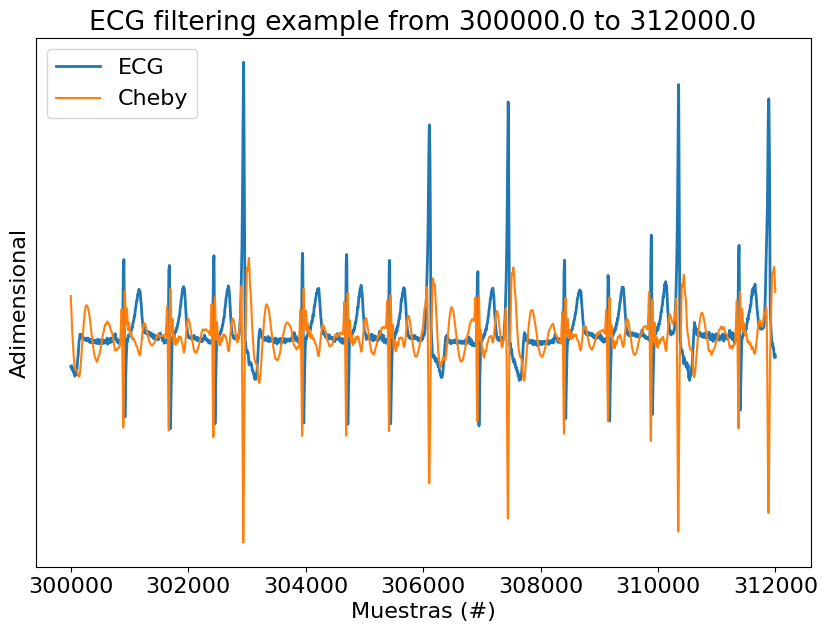

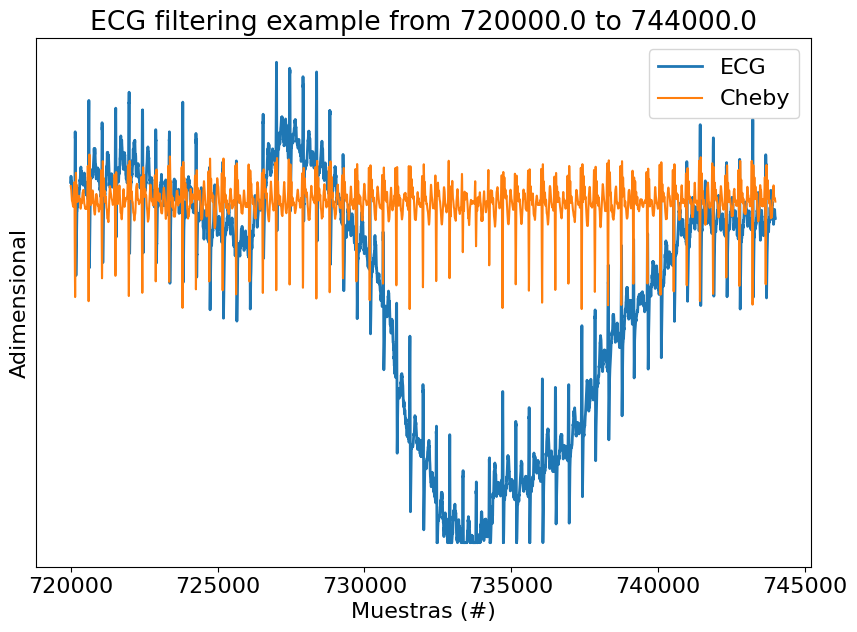

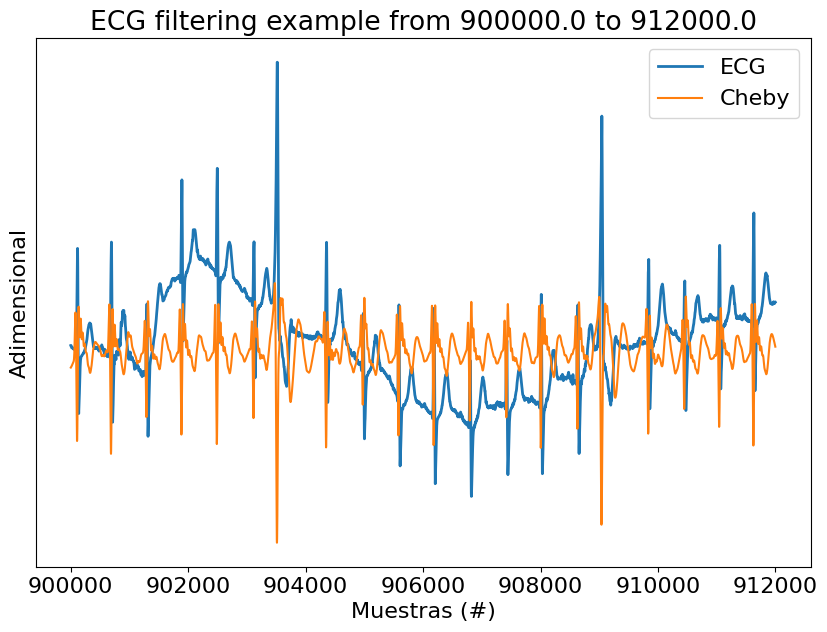

In [8]:
ECG_f_cheby = sig.sosfilt(bp_sos_cheby, ecg_one_lead)

# demora = int(...)

demora = 50


# Segmentos de interés con ALTA contaminación

regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, ECG_f_cheby[zoom_region + demora], label='Cheby')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

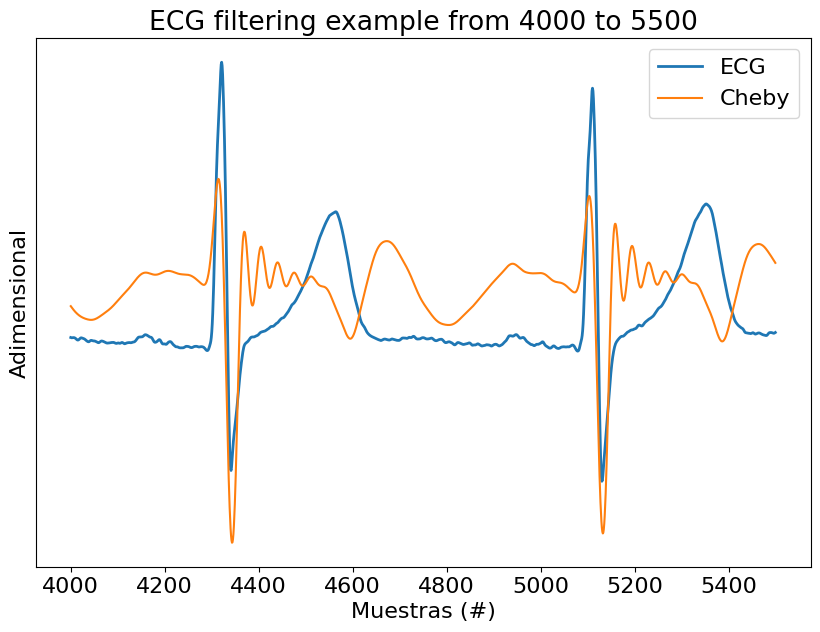

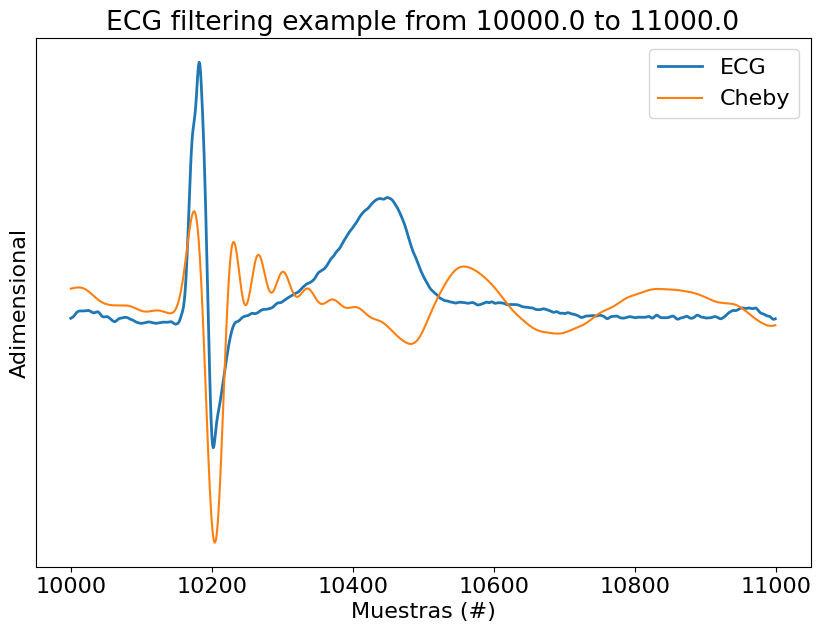

In [14]:
# Segmentos de interés con BAJA contaminación
regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

demora = 20

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, ECG_f_cheby[zoom_region + demora], label='Cheby')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

<p style="text-align: left;font-weight: italic; font-size:15px;"><font color='87CEFA'>Filtrado bidireccional</p>

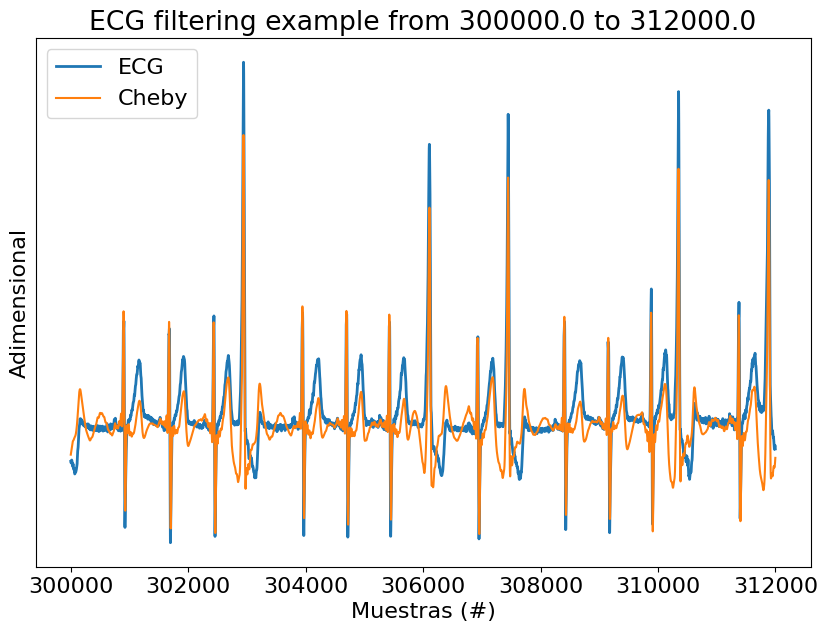

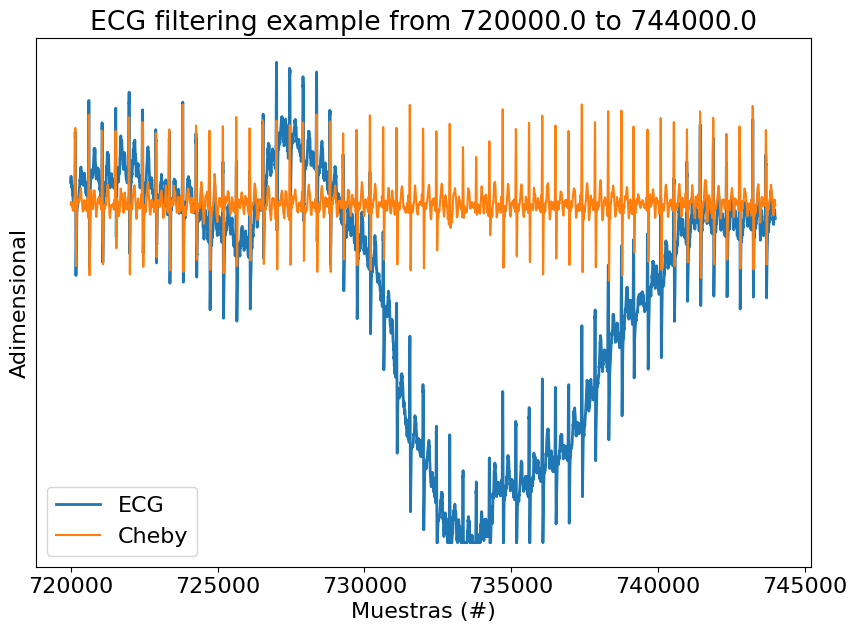

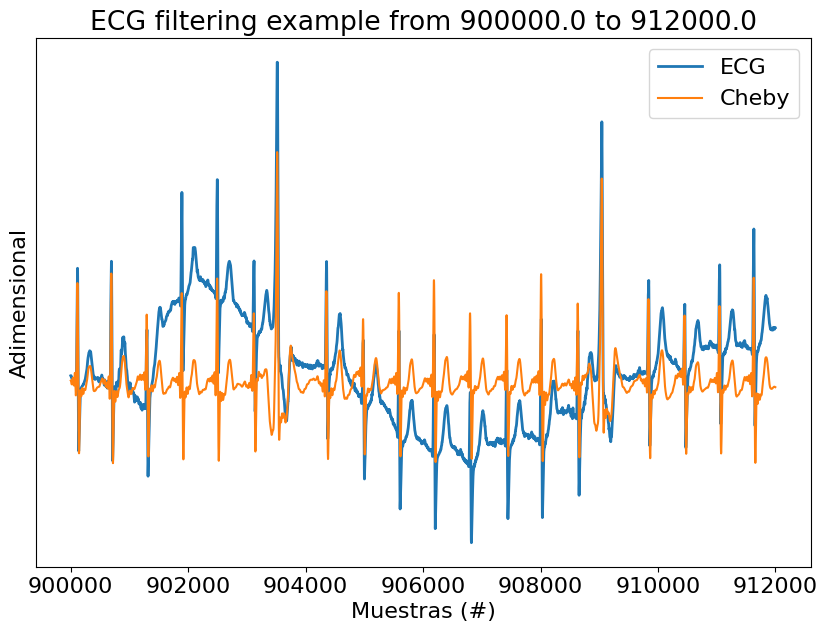

In [16]:
# Procedemos al filtrado 

ECG_f_cheby = sig.sosfiltfilt(bp_sos_cheby, ecg_one_lead)


# Segmentos de interés
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    plt.plot(zoom_region, ECG_f_cheby[zoom_region], label='Cheby')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

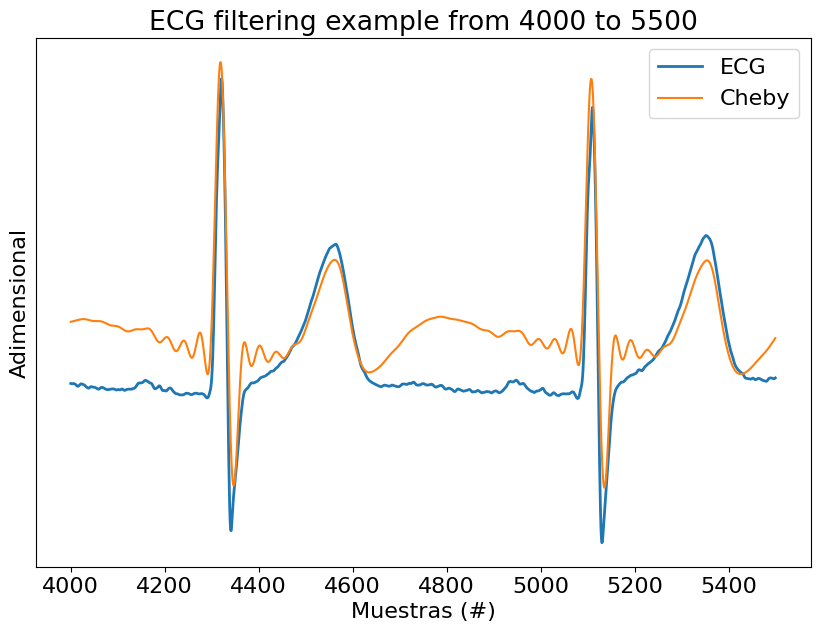

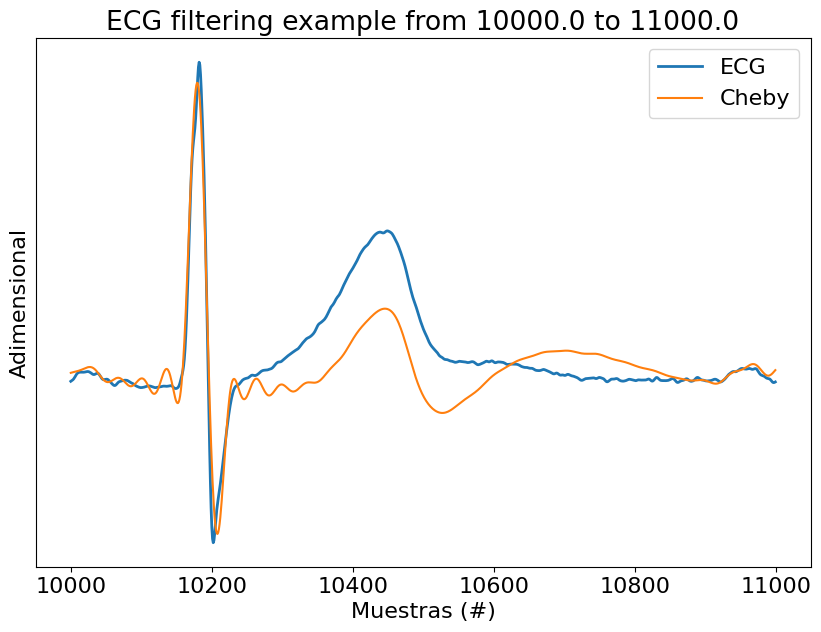

In [15]:
ECG_f_cheby = sig.sosfiltfilt(bp_sos_cheby, ecg_one_lead)

regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    plt.plot(zoom_region, ECG_f_cheby[zoom_region], label='Cheby')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

<p style="text-align: left;font-weight: italic; font-size:15px;"><font color='87CEFA'>Filtro FIR</p>

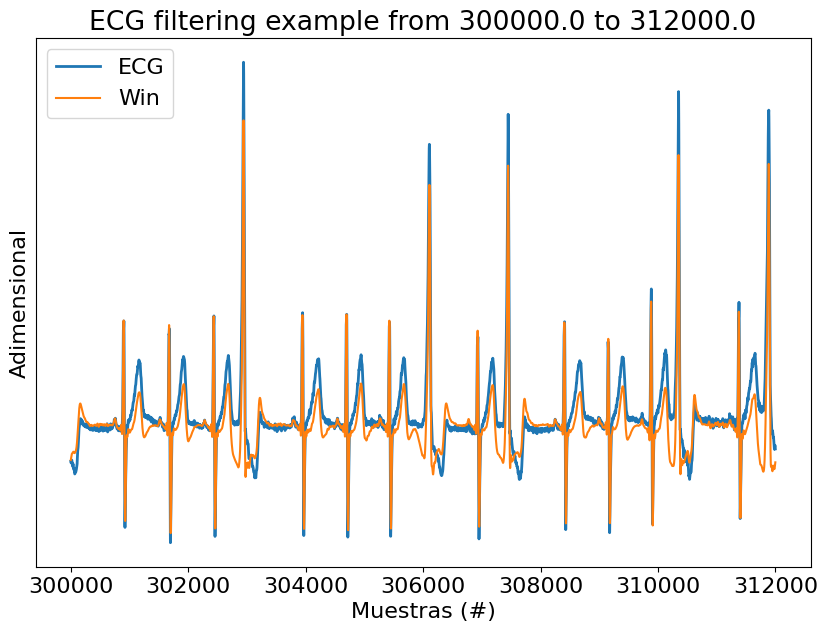

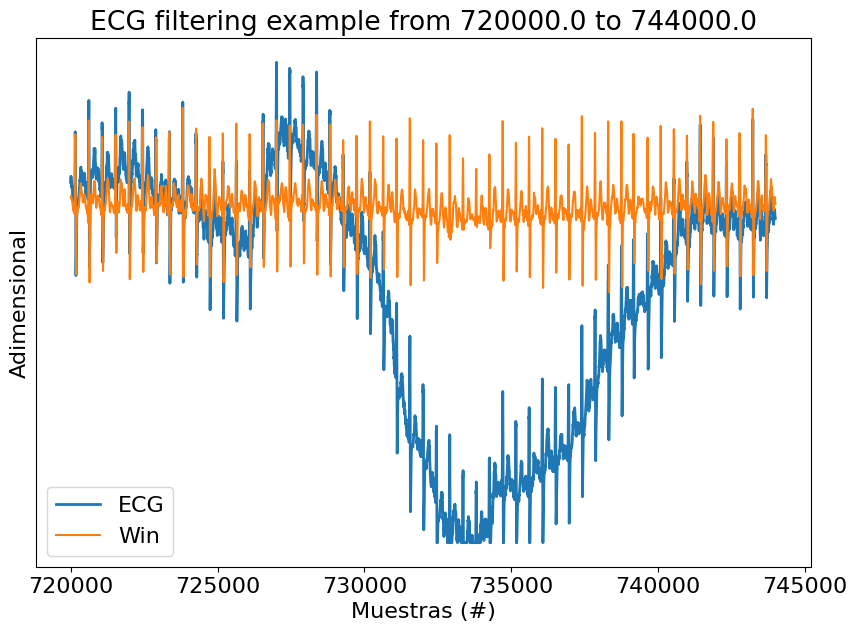

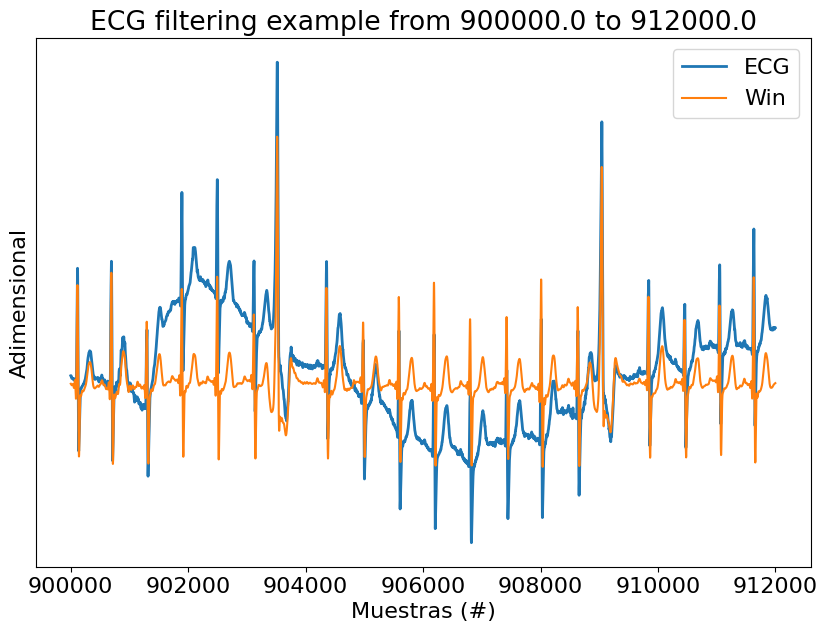

In [10]:
ECG_f_win = sig.lfilter(num_win, den, ecg_one_lead)

# demora = int(...)

demora = 750


# Segmentos de interés con ALTA contaminación

regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

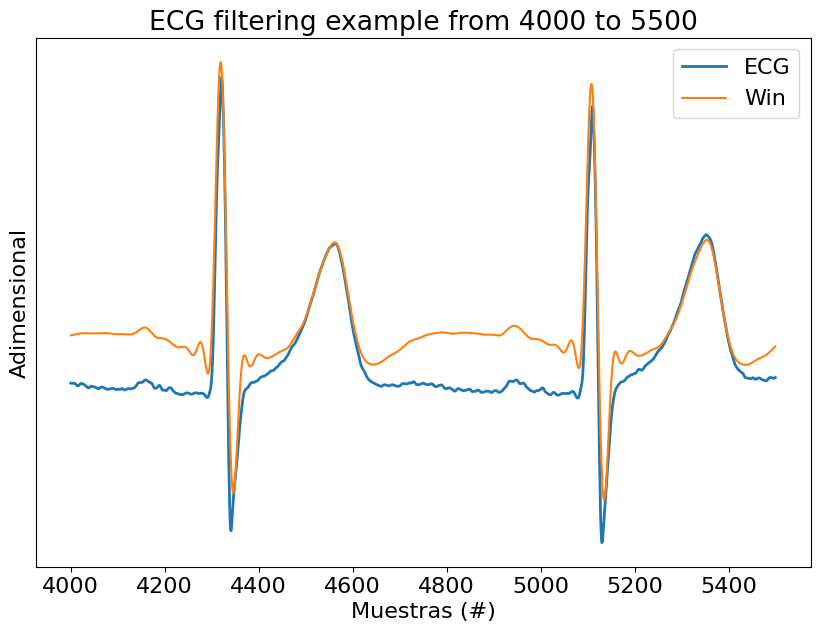

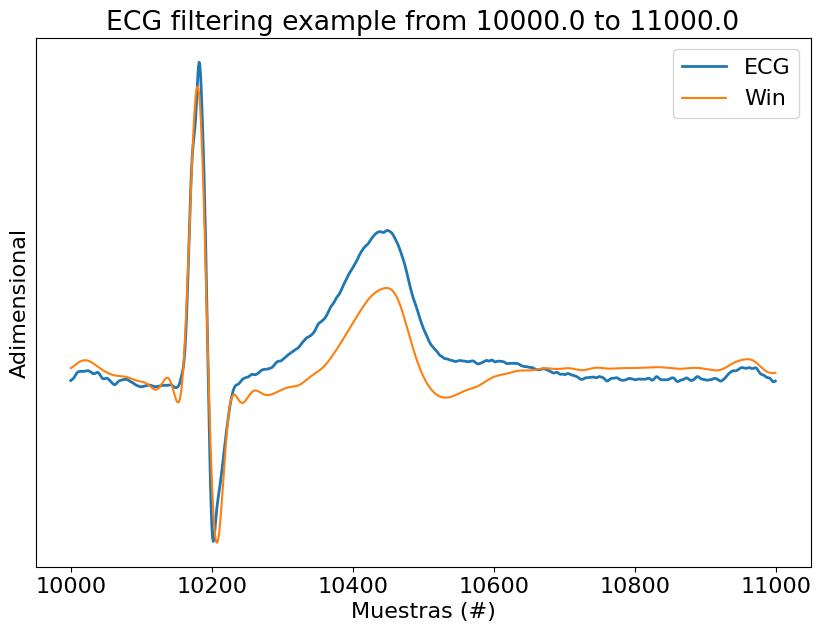

In [11]:
# Segmentos de interés con BAJA contaminación
regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', linewidth=2)
    plt.plot(zoom_region, ECG_f_win[zoom_region + demora], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

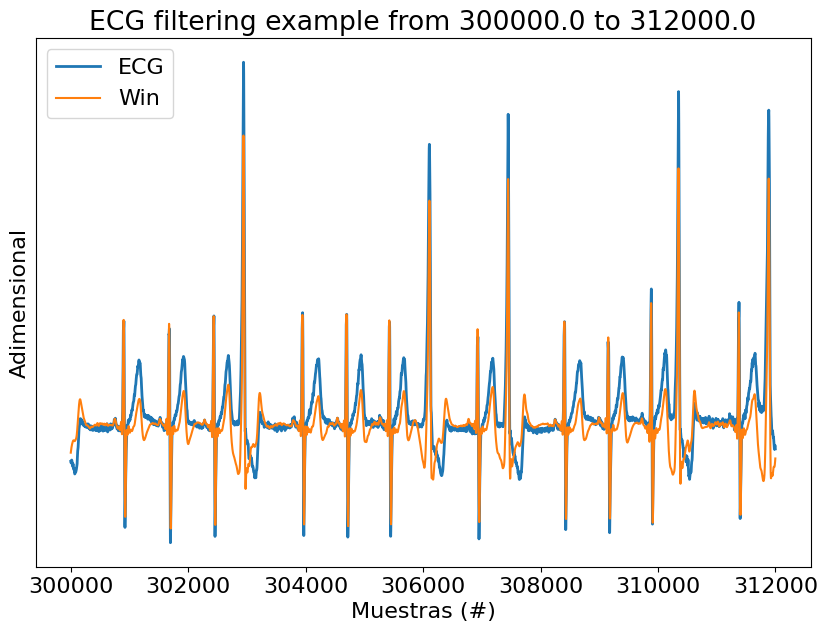

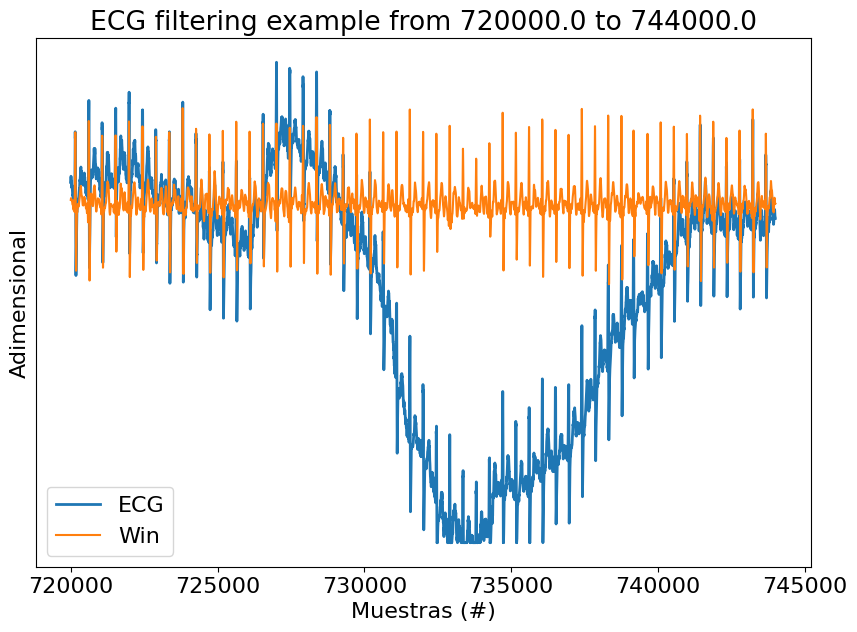

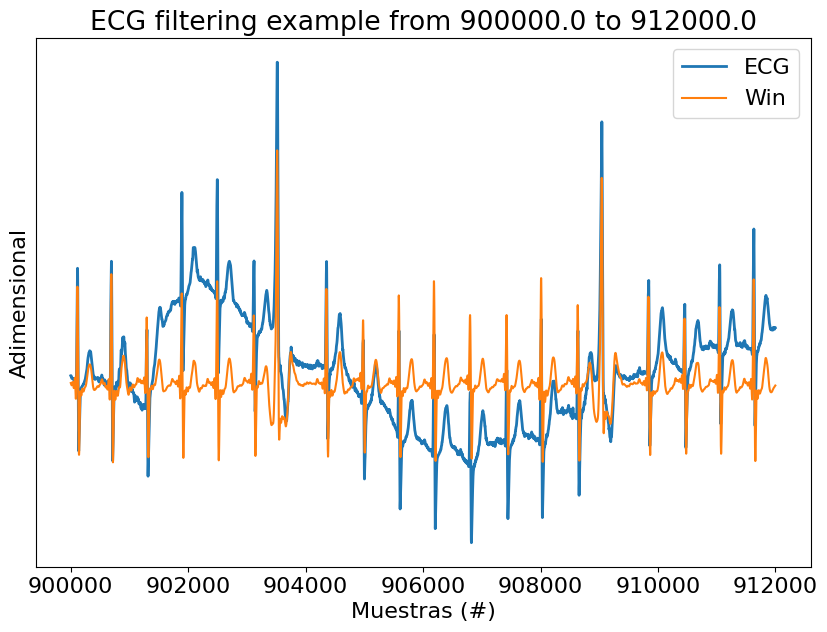

In [12]:
ECG_f_win = sig.filtfilt(num_win, den, ecg_one_lead)

# Segmentos de interés
regs_interes = ( 
        np.array([5, 5.2]) *60*fs, # minutos a muestras
        np.array([12, 12.4]) *60*fs, # minutos a muestras
        np.array([15, 15.2]) *60*fs, # minutos a muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    plt.plot(zoom_region, ECG_f_win[zoom_region], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()

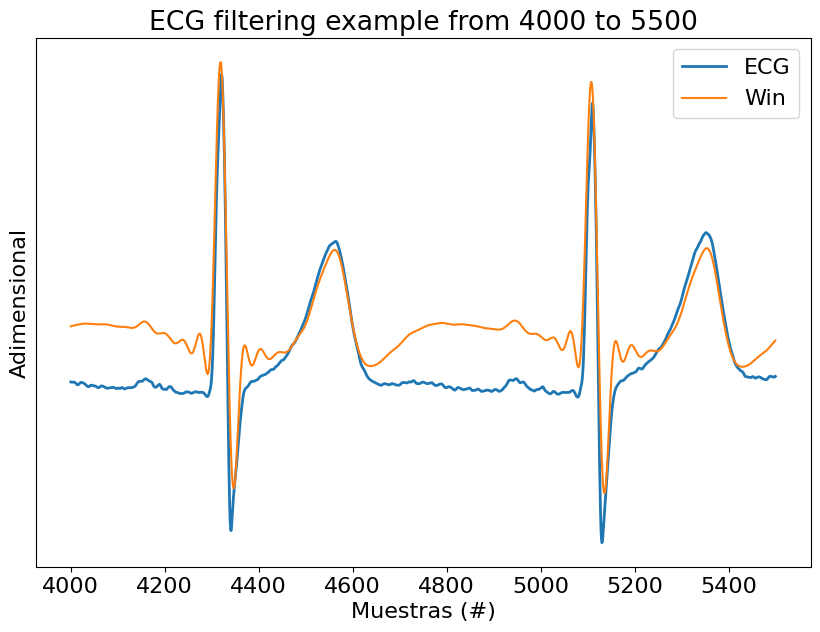

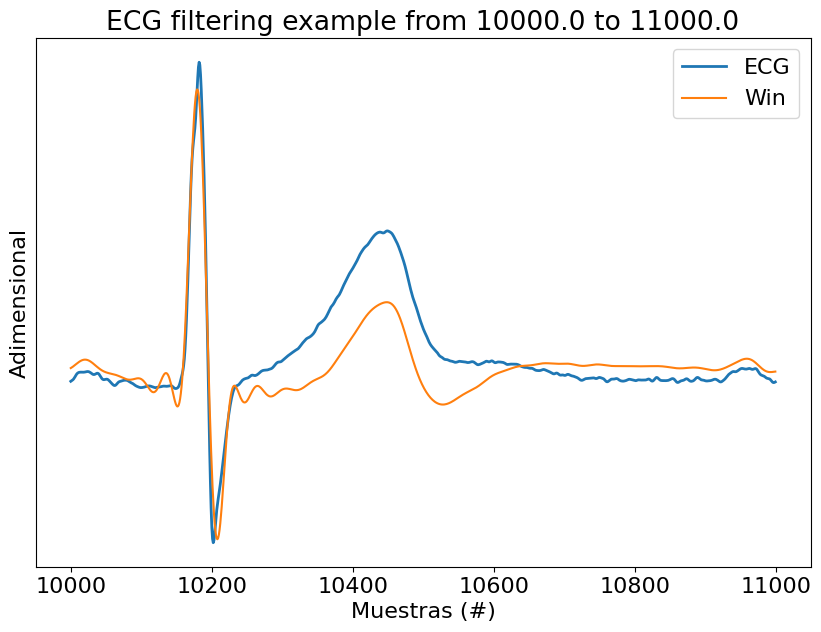

In [13]:
ECG_f_win = sig.filtfilt(num_win, den, ecg_one_lead)

regs_interes = ( 
        [4000, 5500], # muestras
        [10e3, 11e3], # muestras
        )

for ii in regs_interes:
    
    # intervalo limitado de 0 a cant_muestras
    zoom_region = np.arange(np.max([0, ii[0]]), np.min([cant_muestras, ii[1]]), dtype='uint')
    
    plt.figure(figsize=(fig_sz_x, fig_sz_y), dpi= fig_dpi, facecolor='w', edgecolor='k')
    plt.plot(zoom_region, ecg_one_lead[zoom_region], label='ECG', lw=2)
    plt.plot(zoom_region, ECG_f_win[zoom_region], label='Win')
    
    plt.title('ECG filtering example from ' + str(ii[0]) + ' to ' + str(ii[1]) )
    plt.ylabel('Adimensional')
    plt.xlabel('Muestras (#)')
    
    axes_hdl = plt.gca()
    axes_hdl.legend()
    axes_hdl.set_yticks(())
            
    plt.show()